In [1]:
import numpy as np
import os

def read_matrix_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [[int(x) for x in line.split()] for line in lines[1:]]
    return np.array(matrix)


matrix1 = read_matrix_from_file("matrix1.txt")
matrix2 = read_matrix_from_file("matrix2.txt")
result_matrix_cpp = read_matrix_from_file("result_matrix.txt")

result_matrix_numpy = np.dot(matrix1, matrix2)

if np.array_equal(result_matrix_numpy, result_matrix_cpp):
    print("Результаты совпадают")
else:
    print("Результаты не совпадают")

Результаты совпадают


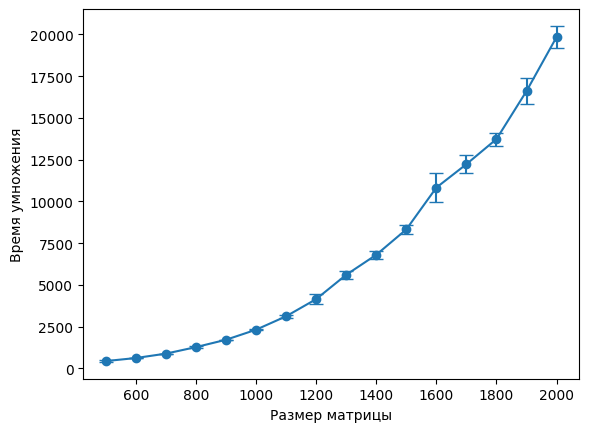

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import statistics as st
import pandas as pd

def read_results(filename):
    sizes = []
    computation_times = []
    with open(filename, 'r') as file:
        while True:
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)
            generation_time = int(file.readline().strip())
            comp_time = int(file.readline().strip())
            total_time = int(file.readline().strip())
            task_size = int(file.readline().strip())
            if not comp_time:
                break
            sizes.append(size)
            computation_times.append(comp_time)
    N = len(computation_times)
    array_1d = np.array(computation_times)
    if N % 10 == 0:
        array_2d = array_1d.reshape(N // 10, 10)
    sizes = np.sort(list(set(sizes)))
    return sizes, array_2d

def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.show()

def get_intervals(computation_times):
    gamma = 0.95
    intervals = []
    for time in computation_times:
        n = len(time)  # Размер выборки
        x_mean = np.mean(time)
        s = np.std(time, ddof=1) 
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return intervals

sizes, computation_times = read_results("results.txt")
arr = pd.DataFrame({"sizes": sizes, "times": list(computation_times)})
intervals = get_intervals(computation_times)
plot_intervals(sizes, intervals)



In [21]:
arr

,sizes,times
0,500,"[520, 354, 361, 348, 349, 350, 350, 349, 351, ..."
1,600,"[500, 497, 491, 500, 493, 497, 500, 491, 497, ..."
2,700,"[677, 707, 671, 672, 679, 683, 682, 676, 673, ..."
3,800,"[892, 885, 889, 911, 999, 912, 890, 895, 895, ..."
4,900,"[1205, 1148, 1159, 1152, 1147, 1152, 1149, 116..."
5,1000,"[1476, 1465, 1523, 1495, 1457, 1456, 1481, 146..."
6,1100,"[1844, 1849, 1861, 1914, 2000, 2452, 2024, 197..."
7,1200,"[2452, 2463, 2445, 2461, 2446, 2480, 2450, 246..."
8,1300,"[3046, 3031, 3074, 3053, 3066, 3051, 3098, 306..."
9,1400,"[3754, 3714, 3772, 3737, 3795, 3752, 3725, 376..."


2 потока

![](2p.png)



4 потока

![](\4.PNG)

8 потоков


![](\8.PNG)

10 потоков


![](\10p.PNG)

12 потоков 


![](\12p.PNG)

Из графиков выше видно, что при увеличении количества ядер, среднее время выполнения умножения уменьшается.

Характеристики устройства
Имя устройства
LAPTOP-Q5VRIPN9
Процессор
11th Gen Intel(R) Core(TM) i5-11400H @
2.70GHz 2.69GHz
Оперативная память
16,0 ГБ (доступно: 15,7 ГБ)
Код устройства
568D343C-36FA-4A0E-9ED3-8CCD62011DDB
Код продукта
00327-31055 -18794-AAOEM
Тип системы
64-разрядная операционная система,
процессор х64